In [32]:
import pandas as pd
import pandas as pd
import re
import openpyxl
import datetime
import sqlite3
import pyarrow as pa
import pyarrow.parquet as pq
from pathlib import Path
import decimal
TOPDIR = r'/home/pp/program/jupyter/Brezno - Klima/'
TEMPDIR= TOPDIR + r'temp/'

# Replace 'your_file.parquet' with the path to your Parquet file
df = pd.read_parquet(TEMPDIR + 'teplotyx.parquet'   )

print(df.head())

             Stanica Teplota  Smer Rýchlosť Nárazy    Tlak Oblačnosť Počasie  \
50  Oravský Podzámok    21.3     S        1   None    None      None    None   
67            Senica    23.4    SZ        2   None  1015.1      None    None   
66        Ružomberok    22.8    JZ        3   None    None      None    None   
65           Rožňava    24.5    JV        1   None  1013.2      None    None   
64           Roztoky    21.6  None        -   None    None      None    None   

    Graf            datetime  
50   NaN 2025-07-30 14:00:00  
67   NaN 2025-07-30 14:00:00  
66   NaN 2025-07-30 14:00:00  
65   NaN 2025-07-30 14:00:00  
64   NaN 2025-07-30 14:00:00  


In [33]:
df.index = df['Stanica']
brez = df.loc[['Roztoky'],:]

In [34]:
brez

,Stanica,Teplota,Smer,Rýchlosť,Nárazy,Tlak,Oblačnosť,Počasie,Graf,datetime
Stanica,,,,,,,,,,
Roztoky,Roztoky,21.6,None,-,None,None,None,None,NaN,2025-07-30 14:00:00
Roztoky,Roztoky,21.9,None,-,None,None,None,None,NaN,2025-07-30 15:00:00
Roztoky,Roztoky,22.2,None,-,None,None,None,None,NaN,2025-07-30 16:00:00
Roztoky,Roztoky,21.5,None,-,None,None,None,None,NaN,2025-07-30 17:00:00
Roztoky,Roztoky,21.8,None,-,None,None,None,None,NaN,2025-07-30 18:00:00
...,...,...,...,...,...,...,...,...,...,...
Roztoky,Roztoky,16.7,None,-,None,None,None,None,NaN,2025-08-24 18:00:00
Roztoky,Roztoky,12.7,None,-,None,None,None,None,NaN,2025-08-24 19:00:00
Roztoky,Roztoky,10.0,None,-,None,None,None,None,NaN,2025-08-24 20:00:00


In [35]:
brez

,Stanica,Teplota,Smer,Rýchlosť,Nárazy,Tlak,Oblačnosť,Počasie,Graf,datetime
Stanica,,,,,,,,,,
Roztoky,Roztoky,21.6,None,-,None,None,None,None,NaN,2025-07-30 14:00:00
Roztoky,Roztoky,21.9,None,-,None,None,None,None,NaN,2025-07-30 15:00:00
Roztoky,Roztoky,22.2,None,-,None,None,None,None,NaN,2025-07-30 16:00:00
Roztoky,Roztoky,21.5,None,-,None,None,None,None,NaN,2025-07-30 17:00:00
Roztoky,Roztoky,21.8,None,-,None,None,None,None,NaN,2025-07-30 18:00:00
...,...,...,...,...,...,...,...,...,...,...
Roztoky,Roztoky,16.7,None,-,None,None,None,None,NaN,2025-08-24 18:00:00
Roztoky,Roztoky,12.7,None,-,None,None,None,None,NaN,2025-08-24 19:00:00
Roztoky,Roztoky,10.0,None,-,None,None,None,None,NaN,2025-08-24 20:00:00


In [36]:
brez.info()

<class 'pandas.core.frame.DataFrame'>
Index: 608 entries, Roztoky to Roztoky
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Stanica    608 non-null    object        
 1   Teplota    608 non-null    object        
 2   Smer       0 non-null      object        
 3   Rýchlosť   608 non-null    object        
 4   Nárazy     0 non-null      object        
 5   Tlak       0 non-null      object        
 6   Oblačnosť  0 non-null      object        
 7   Počasie    0 non-null      object        
 8   Graf       0 non-null      float64       
 9   datetime   608 non-null    datetime64[us]
dtypes: datetime64[us](1), float64(1), object(8)
memory usage: 68.4+ KB


In [37]:
tf = brez
tf.describe()
tf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 608 entries, Roztoky to Roztoky
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Stanica    608 non-null    object        
 1   Teplota    608 non-null    object        
 2   Smer       0 non-null      object        
 3   Rýchlosť   608 non-null    object        
 4   Nárazy     0 non-null      object        
 5   Tlak       0 non-null      object        
 6   Oblačnosť  0 non-null      object        
 7   Počasie    0 non-null      object        
 8   Graf       0 non-null      float64       
 9   datetime   608 non-null    datetime64[us]
dtypes: datetime64[us](1), float64(1), object(8)
memory usage: 68.4+ KB


In [38]:
tf.Teplota = tf.Teplota.astype(float)
print(tf.describe())

          Teplota  Graf                    datetime
count  608.000000   0.0                         608
mean    18.006579   NaN  2025-08-12 05:43:19.342105
min      7.700000   NaN         2025-07-30 14:00:00
25%     14.700000   NaN         2025-08-05 21:45:00
50%     17.400000   NaN         2025-08-12 05:30:00
75%     21.425000   NaN         2025-08-18 13:15:00
max     30.400000   NaN         2025-08-24 22:00:00
std      5.039347   NaN                         NaN


In [39]:
tf

,Stanica,Teplota,Smer,Rýchlosť,Nárazy,Tlak,Oblačnosť,Počasie,Graf,datetime
Stanica,,,,,,,,,,
Roztoky,Roztoky,21.6,None,-,None,None,None,None,NaN,2025-07-30 14:00:00
Roztoky,Roztoky,21.9,None,-,None,None,None,None,NaN,2025-07-30 15:00:00
Roztoky,Roztoky,22.2,None,-,None,None,None,None,NaN,2025-07-30 16:00:00
Roztoky,Roztoky,21.5,None,-,None,None,None,None,NaN,2025-07-30 17:00:00
Roztoky,Roztoky,21.8,None,-,None,None,None,None,NaN,2025-07-30 18:00:00
...,...,...,...,...,...,...,...,...,...,...
Roztoky,Roztoky,16.7,None,-,None,None,None,None,NaN,2025-08-24 18:00:00
Roztoky,Roztoky,12.7,None,-,None,None,None,None,NaN,2025-08-24 19:00:00
Roztoky,Roztoky,10.0,None,-,None,None,None,None,NaN,2025-08-24 20:00:00


In [40]:
tf.Teplota.astype(pd.Float32Dtype()).info() 


<class 'pandas.core.series.Series'>
Index: 608 entries, Roztoky to Roztoky
Series name: Teplota
Non-Null Count  Dtype  
--------------  -----  
608 non-null    Float32
dtypes: Float32(1)
memory usage: 23.9+ KB


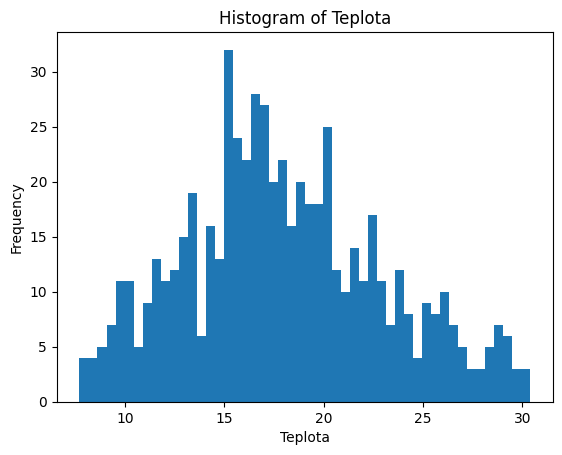

In [41]:
import matplotlib.pyplot as plt
plt.hist(tf.Teplota, bins=50)
plt.xlabel('Teplota')
plt.ylabel('Frequency')
plt.title('Histogram of Teplota')
plt.show()

In [42]:
tf

,Stanica,Teplota,Smer,Rýchlosť,Nárazy,Tlak,Oblačnosť,Počasie,Graf,datetime
Stanica,,,,,,,,,,
Roztoky,Roztoky,21.6,None,-,None,None,None,None,NaN,2025-07-30 14:00:00
Roztoky,Roztoky,21.9,None,-,None,None,None,None,NaN,2025-07-30 15:00:00
Roztoky,Roztoky,22.2,None,-,None,None,None,None,NaN,2025-07-30 16:00:00
Roztoky,Roztoky,21.5,None,-,None,None,None,None,NaN,2025-07-30 17:00:00
Roztoky,Roztoky,21.8,None,-,None,None,None,None,NaN,2025-07-30 18:00:00
...,...,...,...,...,...,...,...,...,...,...
Roztoky,Roztoky,16.7,None,-,None,None,None,None,NaN,2025-08-24 18:00:00
Roztoky,Roztoky,12.7,None,-,None,None,None,None,NaN,2025-08-24 19:00:00
Roztoky,Roztoky,10.0,None,-,None,None,None,None,NaN,2025-08-24 20:00:00


In [43]:
tf

,Stanica,Teplota,Smer,Rýchlosť,Nárazy,Tlak,Oblačnosť,Počasie,Graf,datetime
Stanica,,,,,,,,,,
Roztoky,Roztoky,21.6,None,-,None,None,None,None,NaN,2025-07-30 14:00:00
Roztoky,Roztoky,21.9,None,-,None,None,None,None,NaN,2025-07-30 15:00:00
Roztoky,Roztoky,22.2,None,-,None,None,None,None,NaN,2025-07-30 16:00:00
Roztoky,Roztoky,21.5,None,-,None,None,None,None,NaN,2025-07-30 17:00:00
Roztoky,Roztoky,21.8,None,-,None,None,None,None,NaN,2025-07-30 18:00:00
...,...,...,...,...,...,...,...,...,...,...
Roztoky,Roztoky,16.7,None,-,None,None,None,None,NaN,2025-08-24 18:00:00
Roztoky,Roztoky,12.7,None,-,None,None,None,None,NaN,2025-08-24 19:00:00
Roztoky,Roztoky,10.0,None,-,None,None,None,None,NaN,2025-08-24 20:00:00


In [44]:
tf.columns

Index(['Stanica', 'Teplota', 'Smer', 'Rýchlosť', 'Nárazy', 'Tlak', 'Oblačnosť',
       'Počasie', 'Graf', 'datetime'],
      dtype='object')

In [45]:
tf['datetime']

Stanica
Roztoky   2025-07-30 14:00:00
Roztoky   2025-07-30 15:00:00
Roztoky   2025-07-30 16:00:00
Roztoky   2025-07-30 17:00:00
Roztoky   2025-07-30 18:00:00
                  ...        
Roztoky   2025-08-24 18:00:00
Roztoky   2025-08-24 19:00:00
Roztoky   2025-08-24 20:00:00
Roztoky   2025-08-24 21:00:00
Roztoky   2025-08-24 22:00:00
Name: datetime, Length: 608, dtype: datetime64[us]

In [46]:
tf

,Stanica,Teplota,Smer,Rýchlosť,Nárazy,Tlak,Oblačnosť,Počasie,Graf,datetime
Stanica,,,,,,,,,,
Roztoky,Roztoky,21.6,None,-,None,None,None,None,NaN,2025-07-30 14:00:00
Roztoky,Roztoky,21.9,None,-,None,None,None,None,NaN,2025-07-30 15:00:00
Roztoky,Roztoky,22.2,None,-,None,None,None,None,NaN,2025-07-30 16:00:00
Roztoky,Roztoky,21.5,None,-,None,None,None,None,NaN,2025-07-30 17:00:00
Roztoky,Roztoky,21.8,None,-,None,None,None,None,NaN,2025-07-30 18:00:00
...,...,...,...,...,...,...,...,...,...,...
Roztoky,Roztoky,16.7,None,-,None,None,None,None,NaN,2025-08-24 18:00:00
Roztoky,Roztoky,12.7,None,-,None,None,None,None,NaN,2025-08-24 19:00:00
Roztoky,Roztoky,10.0,None,-,None,None,None,None,NaN,2025-08-24 20:00:00


In [47]:
tf.datetime

Stanica
Roztoky   2025-07-30 14:00:00
Roztoky   2025-07-30 15:00:00
Roztoky   2025-07-30 16:00:00
Roztoky   2025-07-30 17:00:00
Roztoky   2025-07-30 18:00:00
                  ...        
Roztoky   2025-08-24 18:00:00
Roztoky   2025-08-24 19:00:00
Roztoky   2025-08-24 20:00:00
Roztoky   2025-08-24 21:00:00
Roztoky   2025-08-24 22:00:00
Name: datetime, Length: 608, dtype: datetime64[us]

In [48]:
tf['datetime']

Stanica
Roztoky   2025-07-30 14:00:00
Roztoky   2025-07-30 15:00:00
Roztoky   2025-07-30 16:00:00
Roztoky   2025-07-30 17:00:00
Roztoky   2025-07-30 18:00:00
                  ...        
Roztoky   2025-08-24 18:00:00
Roztoky   2025-08-24 19:00:00
Roztoky   2025-08-24 20:00:00
Roztoky   2025-08-24 21:00:00
Roztoky   2025-08-24 22:00:00
Name: datetime, Length: 608, dtype: datetime64[us]

In [49]:
tf['datetime']

Stanica
Roztoky   2025-07-30 14:00:00
Roztoky   2025-07-30 15:00:00
Roztoky   2025-07-30 16:00:00
Roztoky   2025-07-30 17:00:00
Roztoky   2025-07-30 18:00:00
                  ...        
Roztoky   2025-08-24 18:00:00
Roztoky   2025-08-24 19:00:00
Roztoky   2025-08-24 20:00:00
Roztoky   2025-08-24 21:00:00
Roztoky   2025-08-24 22:00:00
Name: datetime, Length: 608, dtype: datetime64[us]

In [50]:
tf[['datetime']]

,datetime
Stanica,
Roztoky,2025-07-30 14:00:00
Roztoky,2025-07-30 15:00:00
Roztoky,2025-07-30 16:00:00
Roztoky,2025-07-30 17:00:00
Roztoky,2025-07-30 18:00:00
...,...
Roztoky,2025-08-24 18:00:00
Roztoky,2025-08-24 19:00:00
Roztoky,2025-08-24 20:00:00


In [51]:
dt = tf[['datetime', 'Teplota']]
print(dt.head())
dt.info()
dt['Teplota'].astype(float).describe()


                   datetime  Teplota
Stanica                             
Roztoky 2025-07-30 14:00:00     21.6
Roztoky 2025-07-30 15:00:00     21.9
Roztoky 2025-07-30 16:00:00     22.2
Roztoky 2025-07-30 17:00:00     21.5
Roztoky 2025-07-30 18:00:00     21.8
<class 'pandas.core.frame.DataFrame'>
Index: 608 entries, Roztoky to Roztoky
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  608 non-null    datetime64[us]
 1   Teplota   608 non-null    float64       
dtypes: datetime64[us](1), float64(1)
memory usage: 30.4+ KB


count    608.000000
mean      18.006579
std        5.039347
min        7.700000
25%       14.700000
50%       17.400000
75%       21.425000
max       30.400000
Name: Teplota, dtype: float64

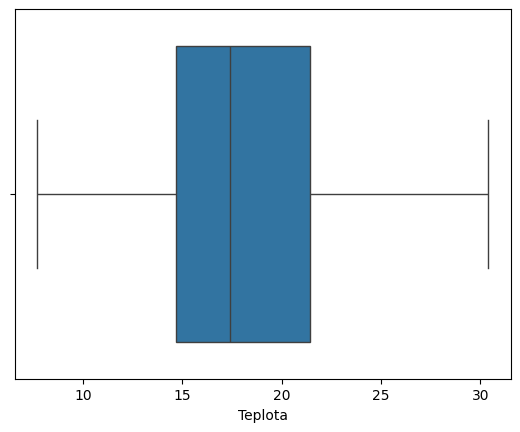

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt 
sns.boxplot(x=dt['Teplota'].astype(float))
plt.show()

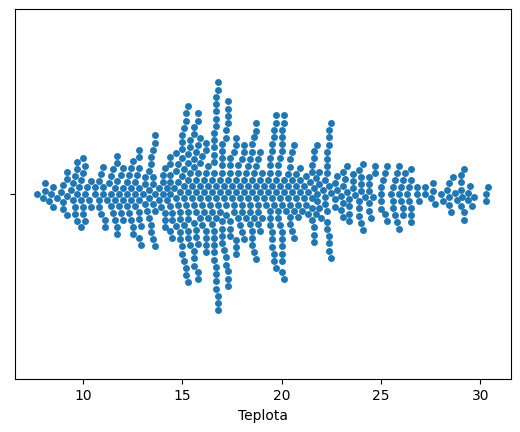

In [53]:
sns.swarmplot(x=dt['Teplota'].astype(float).head(1000))
plt.show()

In [54]:
data=df.head(10000).sort_values(by=['datetime'])
data['Teplota'] = data['Teplota'].astype(float)
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, Oravský Podzámok to Rožňava
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Stanica    10000 non-null  object        
 1   Teplota    10000 non-null  float64       
 2   Smer       9894 non-null   object        
 3   Rýchlosť   10000 non-null  object        
 4   Nárazy     118 non-null    object        
 5   Tlak       3923 non-null   object        
 6   Oblačnosť  1587 non-null   object        
 7   Počasie    256 non-null    object        
 8   Graf       0 non-null      float64       
 9   datetime   10000 non-null  datetime64[us]
dtypes: datetime64[us](1), float64(2), object(7)
memory usage: 859.4+ KB


,Teplota,Graf,datetime
count,10000.000000,0.0,10000
mean,18.016390,NaN,2025-08-01 16:59:13.560000
min,1.400000,NaN,2025-07-30 14:00:00
25%,14.500000,NaN,2025-07-31 15:00:00
50%,17.700000,NaN,2025-08-01 17:00:00
75%,21.800000,NaN,2025-08-02 19:00:00
max,30.200000,NaN,2025-08-03 21:00:00
std,4.910842,NaN,NaN


In [55]:
df.Teplota = df.Teplota.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59420 entries, Oravský Podzámok to Žiharec
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Stanica    59420 non-null  object        
 1   Teplota    59420 non-null  float64       
 2   Smer       58790 non-null  object        
 3   Rýchlosť   59420 non-null  object        
 4   Nárazy     597 non-null    object        
 5   Tlak       23923 non-null  object        
 6   Oblačnosť  9355 non-null   object        
 7   Počasie    971 non-null    object        
 8   Graf       0 non-null      float64       
 9   datetime   59420 non-null  datetime64[us]
dtypes: datetime64[us](1), float64(2), object(7)
memory usage: 7.0+ MB


In [56]:
df.index.unique()

Index(['Oravský Podzámok', 'Senica', 'Ružomberok', 'Rožňava', 'Roztoky',
       'Rimavská Sobota', 'Revúca', 'Ratková', 'Rabča', 'Prievidza',
       ...
       'Kremnické Bane', 'Košice', 'Žilina - Dolný Hričov', 'Kojsovská hoľa',
       'Štrbské pleso', 'Želiezovce', 'Donovaly', 'Košice - letisko',
       'Lučenec - Boľkovce', 'Nitra - Velké Janíkovce'],
      dtype='object', name='Stanica', length=105)

In [57]:
df.index =df.Stanica
dta=df.loc[['Dudince', 'Chopok'],['Teplota','datetime']]
data=dta.loc[['Dudince'],:].sort_values(by=['datetime'])
data

,Teplota,datetime
Stanica,,
Dudince,27.5,2025-07-30 14:00:00
Dudince,27.3,2025-07-30 15:00:00
Dudince,27.3,2025-07-30 15:00:00
Dudince,27.5,2025-07-30 16:00:00
Dudince,26.8,2025-07-30 17:00:00
...,...,...
Dudince,20.5,2025-08-24 18:00:00
Dudince,19.4,2025-08-24 19:00:00
Dudince,16.0,2025-08-24 20:00:00


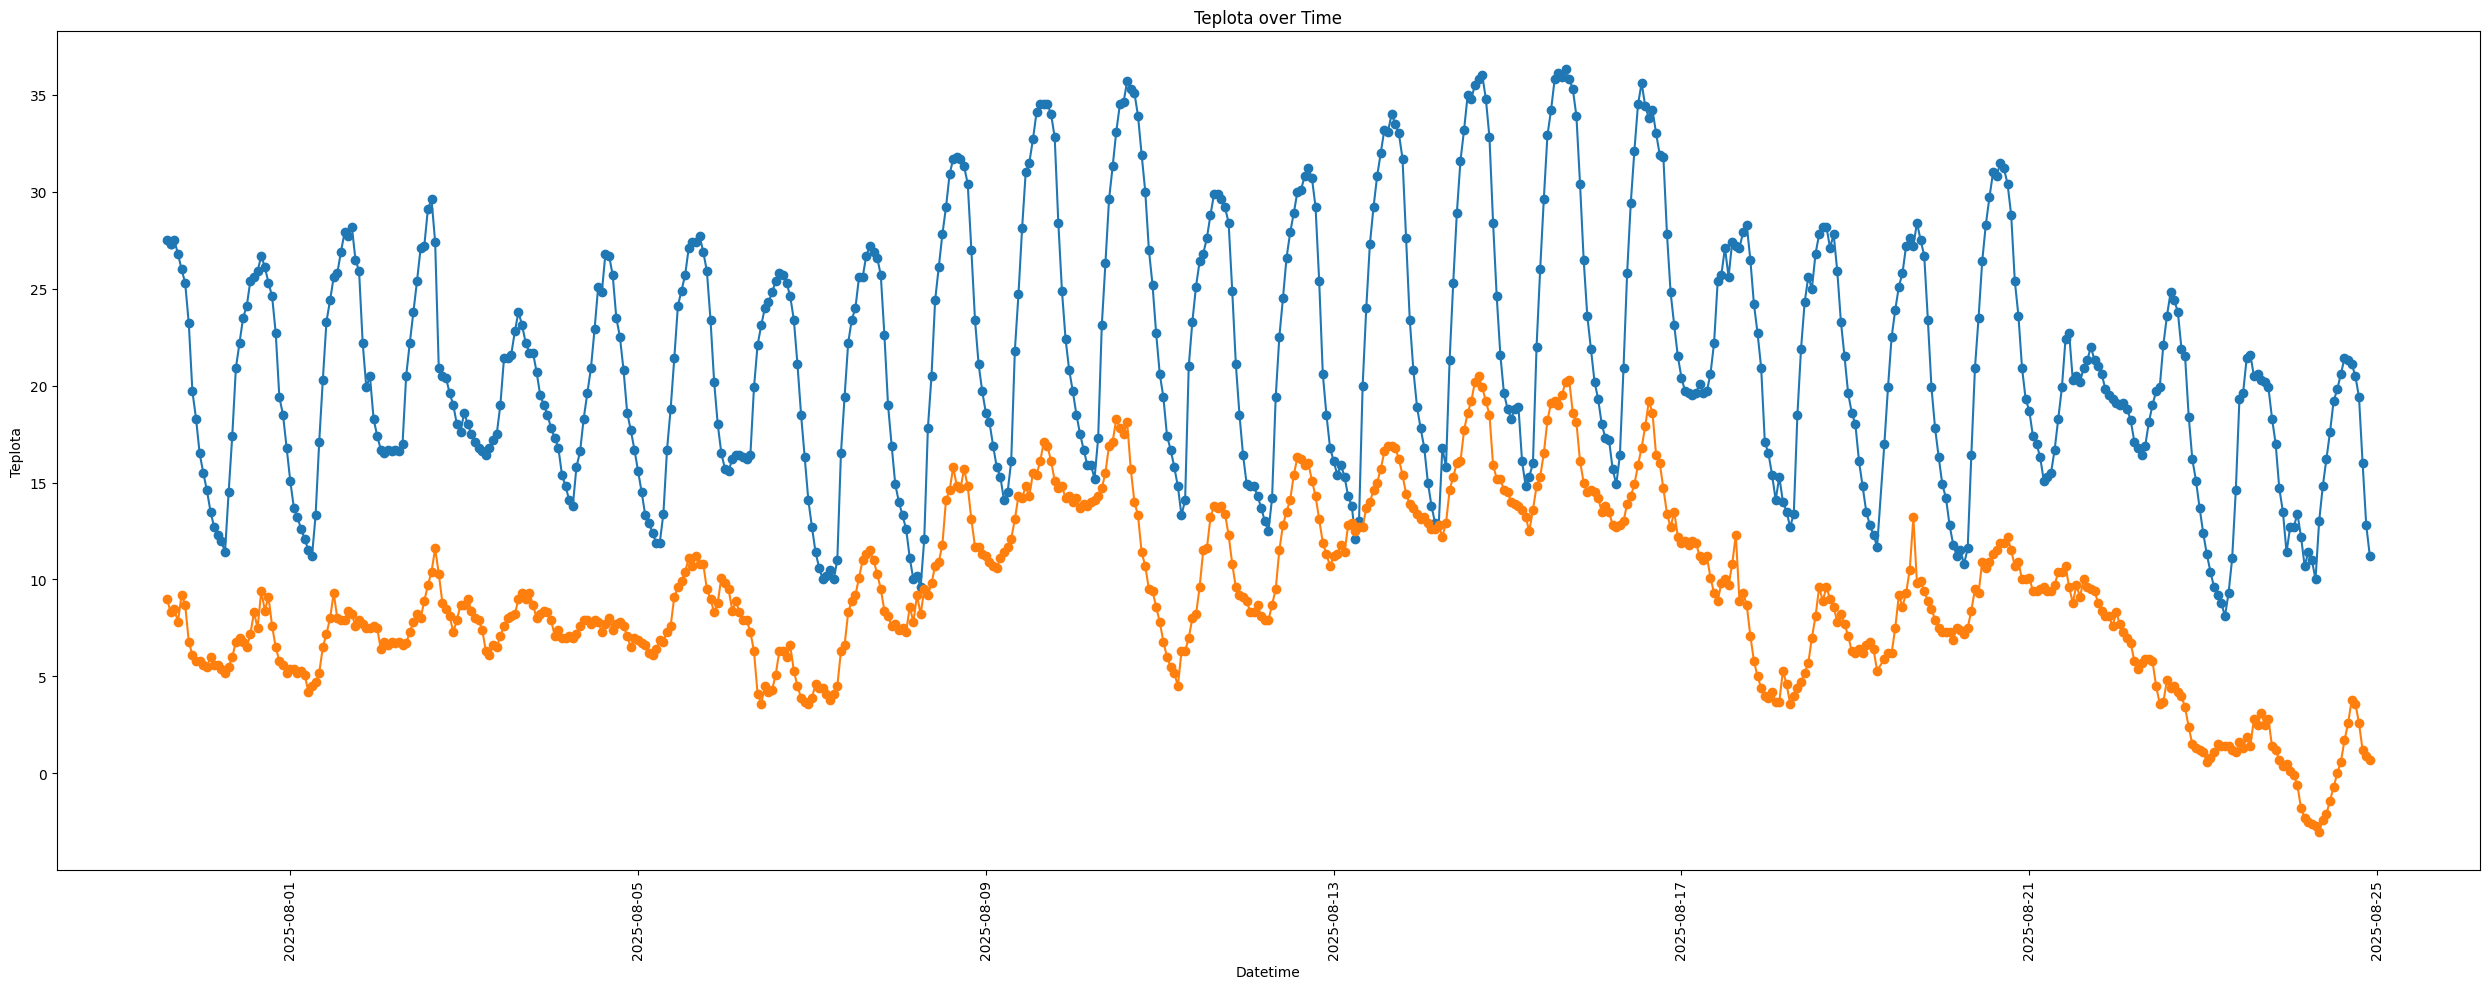

In [58]:
dta=df.loc[['Dudince', 'Žilina','Chopok'],['Teplota','datetime']]
dta=df.loc[['Dudince', 'Chopok'],['Teplota','datetime']]

plt.figure(figsize=(25, 10))
data=dta.loc[['Dudince'],:].sort_values(by=['datetime'])
plt.plot(data['datetime'], data['Teplota'],marker='o', linestyle='-')
data=dta.loc[['Chopok'],:].sort_values(by=['datetime'])
plt.plot(data['datetime'], data['Teplota'],marker='o', linestyle='-')
plt.xlabel('Datetime')
plt.ylabel('Teplota')
plt.title('Teplota over Time')
plt.xticks(rotation=90)
plt.tight_layout()
plt.size=(150, 10)
plt.show()

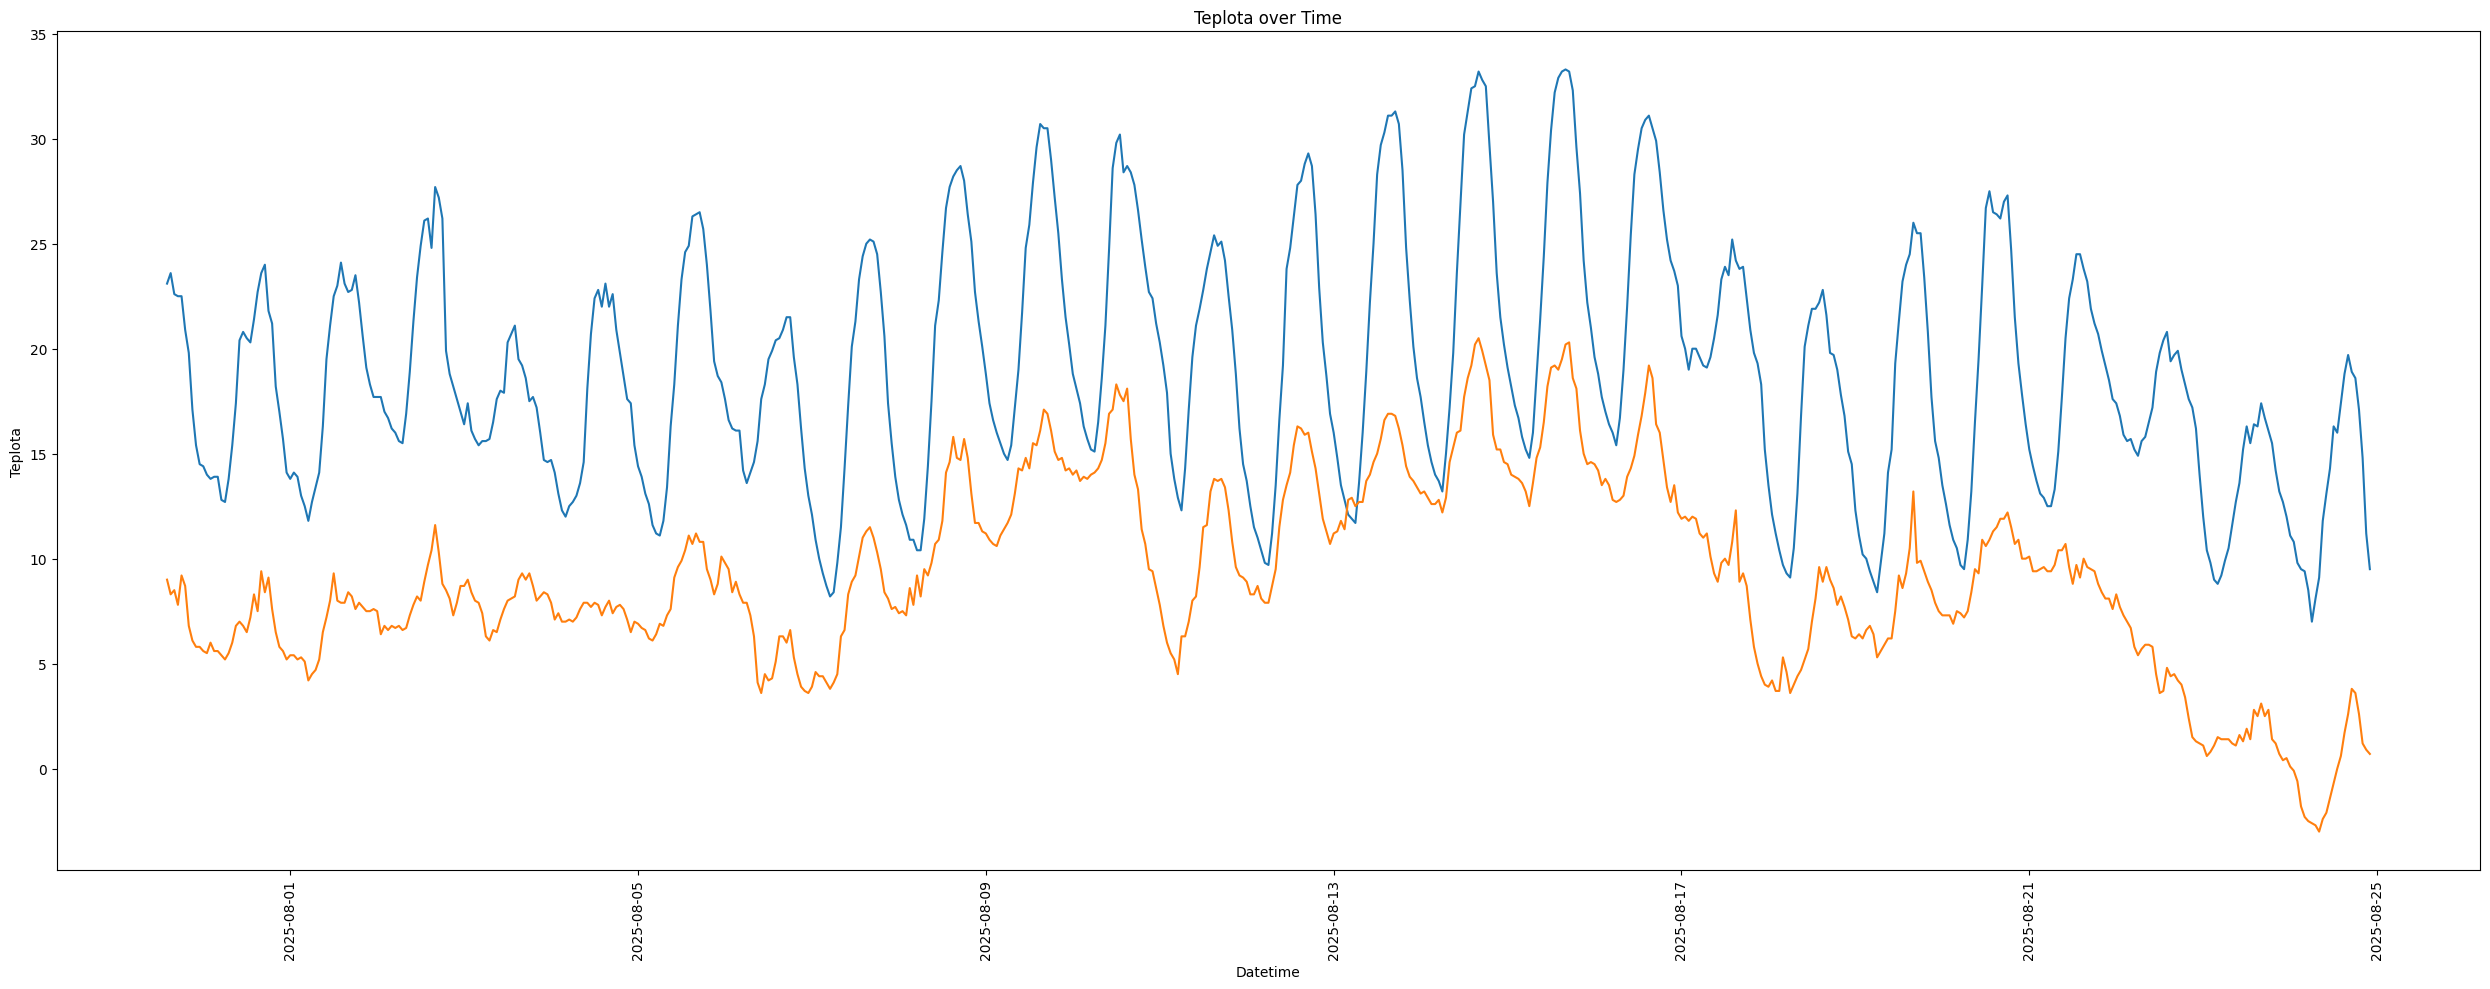

In [59]:
# dta=df.loc[['Dudince', 'Žilina','Chopok'],['Teplota','datetime']]
# dta=df.loc[['Dudince', 'Chopok'],['Teplota','datetime']]

plt.figure(figsize=(25, 10))
data=df.loc[['Žilina'],:].sort_values(by=['datetime'])
plt.plot(data['datetime'], data['Teplota'],marker='', linestyle='-')
data=df.loc[['Chopok'],:].sort_values(by=['datetime'])
plt.plot(data['datetime'], data['Teplota'],marker='', linestyle='-')
plt.xlabel('Datetime')
plt.ylabel('Teplota')
plt.title('Teplota over Time')
plt.xticks(rotation=90)
plt.tight_layout()
plt.size=(150, 10)
plt.show()

In [61]:
dta=df.loc[['Dudince', 'Žilina','Chopok'],['Teplota','datetime']]
dta=df.loc[['Dudince', 'Chopok'],['Teplota','datetime']]
# df = df.drop('Stanica', axis=1)

# davg = df.groupby(df.datetime.dt.dayofweek)['Teplota'].mean() #OK returns Series
#print(df[['Teplota','datetime']]) #.info()
# davg.info()
# print(davg)
# davg = df[['Stanica', 'Teplota','datetime']].groupby(pd.Grouper(key = 'Stanica')).mean() #OK Returns DataFrame
# davg.info()
# err davg = dta.groupby(pd.Grouper(key = ['Stanica', 'datetime'], freq='1d')).mean()             #ERROR
# davg = df.groupby('Stanica').apply(lambda x: x.rolling('1D',on='datetime',closed='left')['Teplota'].sum())
# davg = df.groupby(['Stanica', 'datetime'])['Teplota'].mean().reset_index()
# print(davg)
# dmi = df.set_index('datetime').groupby('Stanica').resample('1D')['Teplota'].mean().reset_index()
# print(dmi)


In [65]:
df = df.drop('Stanica', axis=1)
dmi = df.reset_index()
dmi = dmi.set_index(['datetime']).groupby('Stanica').resample('12H')['Teplota'].mean().reset_index()

print(dmi)
df = dmi
plt.figure(figsize=(25, 10))
data=df.loc[['Žilina - letisko'],:].sort_values(by=['datetime'])
plt.plot(data['datetime'], data['Teplota'],marker='', linestyle='-')
data=df.loc[['Chopok'],:].sort_values(by=['datetime'])
plt.plot(data['datetime'], data['Teplota'],marker='', linestyle='-')
plt.xlabel('Datetime')
plt.ylabel('Teplota')
plt.title('Teplota over Time')
plt.xticks(rotation=90)
plt.tight_layout()
plt.size=(150, 10)
plt.show()



KeyError: 'Stanica'